# Kernelized Support Vector Machines

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
from sklearn.svm import LinearSVC
from mpl_toolkits.mplot3d import Axes3D,axes3d
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC

The below plot shows us how a linear classification model fails to classify a dataset like this. Here it would be unable to use lines or hyperplanes to divide the dataset into required two categories.

Text(0, 0.5, 'Feature 1')

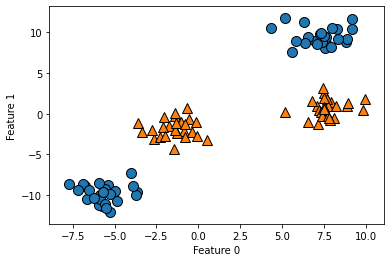

In [6]:
X,y = mglearn.datasets.make_blobs(centers =4, random_state =8)
y= y%2

mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

/Users/nidhiashok/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Text(0, 0.5, 'Feature 1')

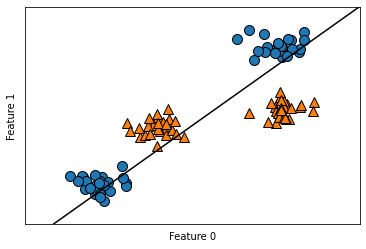

In [8]:
linear_svm = LinearSVC().fit(X,y)

mglearn.plots.plot_2d_separator(linear_svm,X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

<ipython-input-11-443c318e5963>:9: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure,elev=-152,azim=-26)


Text(0.5, 0, 'feature1^2')

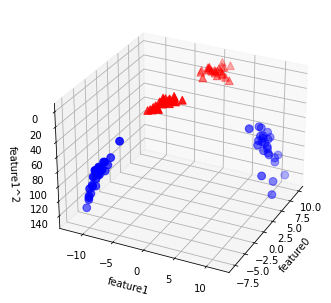

In [11]:
# lets add another feature to the plot, (feature 1)^2

X_new = np.hstack([X,X[:,1:]**2])

figure = plt.figure()

#visualising in 3d

ax = Axes3D(figure,elev=-152,azim=-26)
mask = y == 0
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c='b',cmap=mglearn.cm2,s=60)
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',marker='^',cmap=mglearn.cm2,s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1^2")

/Users/nidhiashok/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
<ipython-input-12-9eae460206dd>:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure,elev=-152,azim=-26)


Text(0.5, 0, 'feature1^2')

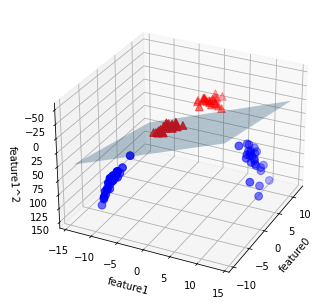

In [12]:
linear_svm_3d = LinearSVC().fit(X_new,y)
coef, intercept = linear_svm_3d.coef_.ravel(),linear_svm_3d.intercept_

#showing linear decision boundaries
figure = plt.figure()
ax = Axes3D(figure,elev=-152,azim=-26)
xx = np.linspace(X_new[:,0].min() - 2, X_new[:,0].max()+2,50)
yy = np.linspace(X_new[:,1].min() - 2, X_new[:,1].max()+2,50)

XX,YY = np.meshgrid(xx,yy)
ZZ = (coef[0]*XX+coef[1]*YY+intercept)/-coef[2]

ax.plot_surface(XX,YY,ZZ,rstride=8,cstride=8,alpha=0.3)
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c='b',cmap=mglearn.cm2,s=60)
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',marker='^',cmap=mglearn.cm2,s=60)

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1^2")

Text(0, 0.5, 'Feature 1')

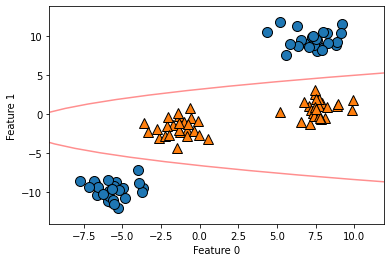

In [13]:
# decision boundary formed as a function of original two features

ZZ = YY **2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(),YY.ravel(),ZZ.ravel()])
plt.contour(XX,YY, dec.reshape(XX.shape),levels=[dec.min(),0,dec.max()],cmap=mglearn.cm2,alpha=0.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

The kernel trick works by directly computing the distance (scalar product) of the data points for the expanded feature representation, without actually computing the expansion.
This helps us overcome the computational cost of having to calculate combination of many features and helps us learn a classifier in higher-dimeansional space.

There are two ways to map the kernel:
- polynomial kernel: computes all possible polynomial upto a certain degree of the original features. ex:feature1^2, feature2^5.
- Gaussian kernel or Radial basis function(rbf): all possible polynomials of all degrees, but importance for higher degree decreases. 

##### Understanding SVM

A subset of training points matter for defining the decision boundary. The ones that lie on the border between the classes. These are called support vectors.

To make a prediction to a new point, the distance to each support vector is measured. Classification decision is made based on the distance and the importance of the support vector learned during training. 

Text(0, 0.5, 'Feature 1')

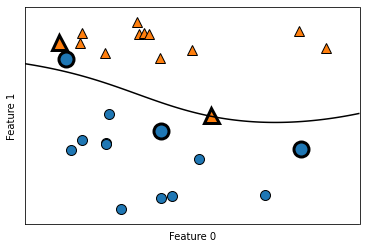

In [16]:
X,y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm,X,eps=.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)

#plot support vectors
sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel()>0

mglearn.discrete_scatter(sv[:,0],sv[:,1],sv_labels,s=15,markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

##### Tuning SVM

- gamma parameter: controls width of gaussian kernel. scale of what it means for the points to be close together.
- C parameter: regularization parameter. limits the importance of each point.

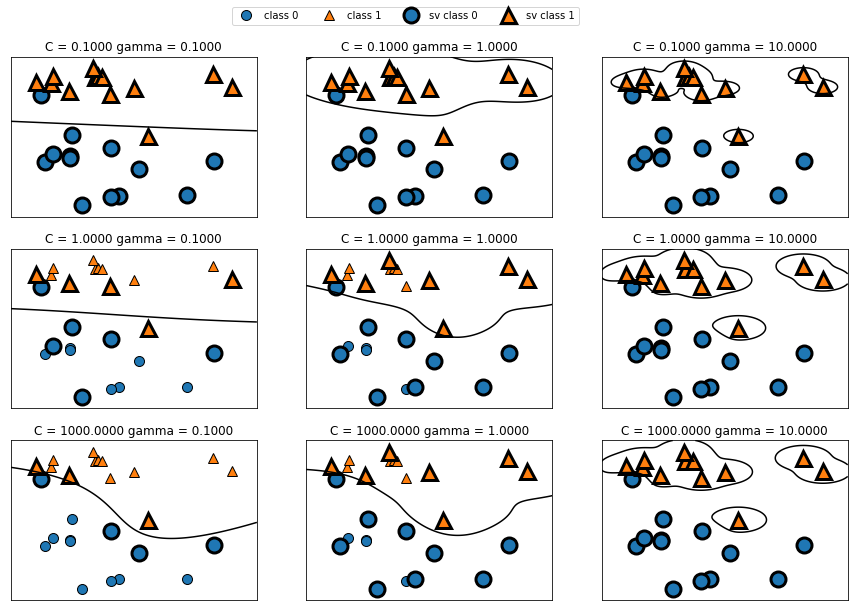

In [17]:
fig, axes = plt.subplots(3,3, figsize=(15,10))

for ax,C in zip(axes,[-1,0,3]):
    for a, gamma in zip(ax,range(-1,2)):
        mglearn.plots.plot_svm(log_C=C,log_gamma=gamma,ax=a)
        
axes[0,0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],ncol=4,loc=(.9,1.2))

The gamma value increases from 0.1 to 10, left to right. small gamma value indicates many points are considered closeby and leads to smooth decision boundary(left).high gamma value focuses on single points farther leading to varying decision boundaries. low gamma value -> low model complexity, high value -> high model complexity.

Top to Bottom, increasing C parameter from 0.1 to 1000. small C restricted model, with each data point having limited influence. lower C leads to linear models not accomodating missclassification. higher C value helps bend the decision boundaries.

### Understanding SVM using Breast Cancer Dataset

In [18]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,random_state=42)

In [27]:
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [28]:
print("Accuracy on training set: {:.2f}".format(svc.score(X_train,y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test,y_test)))

Accuracy on training set: 0.91
Accuracy on test set: 0.95


SVM is sensitive to parameter settings and scaling of data. The features require to be on similar scale.

In [31]:
# preprocessing data to improve accuracy

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
svc = SVC()
svc.fit(X_train_scaled,y_train)

SVC()

In [33]:
print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled,y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled,y_test)))

Accuracy on training set: 0.99
Accuracy on test set: 0.97


In [34]:
svc = SVC(C=1000)
svc.fit(X_train_scaled,y_train)

SVC(C=1000)

In [35]:
print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled,y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled,y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.94


##### Points to remember

- Allows complex decision boundaries.
- Works well with few and many features (low or high dimensionality).
- Does not work well with large number of samples interms of runtime and memory usage. 
- requires careful preprocessing of data and parameter tuning. 
- lacks explicability as they are hard to inspect.
- C and gamma tend to be corelated hence should be adjusted together.